In [1]:
# jupyter specific magic operator
%pylab inline
# import numpy as np
# from numpy import *
# import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
fname = './ActivationStep1.inc1.id1.sim'

In [3]:
!head -n 200 $fname

# Simulation data file
# Created by Cosima and  Geant4 version Name: geant4-10-02-patch-03    (27-January-2017)

Type       SIM
Version    101
Geometry   /Users/Matt/megalib/resource/examples/geomega/special/ActivationSphere.geo.setup

Date       2017-11-02 19:58:52
MEGAlib    2.99.04

Seed       1509677931

SimulationStartAreaFarField 81.7128
BeamType FarFieldAreaSource 0 180 0 360
SpectralType FileDifferentialFlux

TB 0

SE
ID 1 1
TI 0.003234401
ED 68305.6
EC 1.91933e+06
NS 0
IA INIT  1; 0;0;0.000000000000e+00;   3.36560;  -3.97329;  -0.12627;0; 0.00000; 0.00000; 0.00000; 0.00000; 0.00000; 0.00000;     0.000;4;-0.54352; 0.81707; 0.19232; 0.00000; 0.00000; 0.00000;1987631.520
IA ESCP  2; 1;0;4.434363369790e-09; -62.87376; 100.00000;  23.83026;4;-0.52579; 0.82892; 0.19090; 0.00000; 0.00000; 0.00000;1919325.912;0; 0.00000; 0.00000; 0.00000; 0.00000; 0.00000; 0.00000;     0.000
IA BREM  3; 1;4;3.138172496050e-10;  -1.51429;   3.27991;   1.53782;3; 0.73729; 0.29293; 0.60877; 0.00000; 0.00

# The hit key

```
HT
1. Detector ID (see table of detector IDs) 
2. x position of interaction in cm
3. y position of interaction in cm
4: z position of interaction in cm
5: Energy deposit in keV
6: Time since start of event in seconds
7: Vector of IDs of the interactions which contributed to this hit
```

In [4]:
energies = []
with open(fname, 'r') as infile:
    for i, l in enumerate(infile):
        if i < 1e100:  # stop after n lines
            if l.startswith('HTsim'):
                data = [x.strip() for x in l.split(';')]  # break on `;` and strip whitespace
                energy_keV = float(data[4])
                energies.append(energy_keV)
        if i % 100000 == 0:
            print(i)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [5]:
type(energies)

list

In [6]:
nrg = np.array(energies)
nrg

array([ 68305.60755,  67369.94248,  37561.3076 , ...,  81117.81555,
        13848.96875,  27573.65079])

In [7]:
nrg.mean()

102799.20904764417

In [8]:
nrg.std()

174784.37338869571

In [9]:
counts, bin_edges = np.histogram(nrg, bins=1000)

In [10]:
bin_edges

array([  3.97488930e+02,   1.04474758e+04,   2.04974626e+04, ...,
         1.00302844e+07,   1.00403343e+07,   1.00503843e+07])

In [11]:
counts.dtype

dtype('int64')

In [12]:
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2

In [13]:
len(bin_centers)

1000

In [14]:
len(counts)

1000

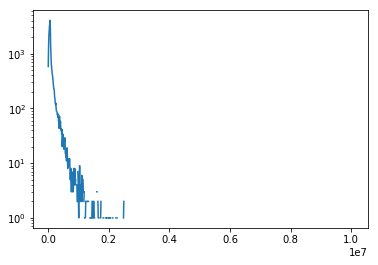

In [15]:
semilogy(bin_centers, counts)

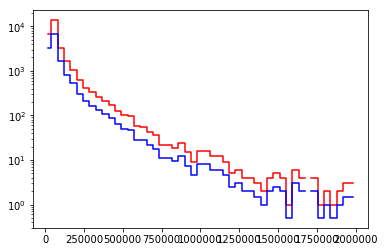

In [16]:
counts, bin_edges = np.histogram(nrg, bins=np.linspace(0, 2e6))
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
semilogy(bin_centers, counts, linestyle='steps-mid', color='r')
semilogy(bin_centers, counts/2, linestyle='steps-mid', color='b')
